In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [2]:
import ssl

In [3]:
ssl._create_default_https_context = ssl._create_unverified_context


In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

In [9]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
y_train[0]

array([6], dtype=uint8)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:

import matplotlib.pyplot as plt
def plot_i(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])

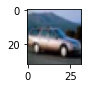

In [14]:
plot_i(4)

In [15]:
 classes[y_train[3][0]]

'deer'

In [16]:
y_train[3]

array([4], dtype=uint8)

In [17]:
x_train_scale=x_train/255
x_test_scale=x_test/255

In [44]:
y_train_cat=keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_test_cat=keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

In [45]:
y_train_cat[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [46]:
model=keras.Sequential([
keras.layers.Flatten(input_shape=(32,32,3)),
keras.layers.Dense(1000,activation='relu'),
keras.layers.Dense(10,activation='sigmoid')
])

In [47]:
model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [48]:
model.fit(x_train_scale,y_train_cat,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 33s 16ms/step - loss: 1.8503 - accuracy: 0.3413
Epoch 2/5
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6690 - accuracy: 0.41250s - loss: 1.6687 - accuracy
Epoch 3/5
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5939 - accuracy: 0.4399
Epoch 4/5
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5397 - accuracy: 0.46250s - loss: 1.5394 - accuracy: 0.46
Epoch 5/5
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4978 - accuracy: 0.4732


In [49]:
model.predict(x_test_scale)

array([[0.3996922 , 0.73755634, 0.69408476, ..., 0.15932071, 0.5922791 ,
        0.16520894],
       [0.7901164 , 0.96301323, 0.31004432, ..., 0.11424521, 0.8983888 ,
        0.9761388 ],
       [0.9540415 , 0.9252092 , 0.5059068 , ..., 0.1955216 , 0.9155381 ,
        0.9128397 ],
       ...,
       [0.06672344, 0.07694882, 0.82143104, ..., 0.6224395 , 0.3030096 ,
        0.18441159],
       [0.32700872, 0.31048232, 0.82830966, ..., 0.37856486, 0.07403028,
        0.30802318],
       [0.54537636, 0.30295622, 0.7191238 , ..., 0.89216924, 0.13338575,
        0.37158865]], dtype=float32)

In [50]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [51]:
classes[y_test[0][0]]

'cat'

In [52]:
classes[np.argmax(model.predict(x_test_scale)[0])]

'cat'

In [53]:
model.evaluate(x_test_scale,y_test_cat)

313/313 [==============================] - 8s 4ms/step - loss: 1.5223 - accuracy: 0.4699


[1.5222575664520264, 0.4699000120162964]